In [1]:
import numpy as np
import networkx as nx

import cirq

import matplotlib.pyplot as plt
%matplotlib inline

import sys, os
from copy import deepcopy
from time import time

In [2]:
libpath = os.path.abspath('..')
if libpath not in sys.path:
    sys.path.append(libpath)

In [3]:
from QubitRBM.qaoa import QAOA
from QubitRBM.optimize import rx_optimization
import QubitRBM.exact_gates as eg
import QubitRBM.utils as utils
from QubitRBM.rbm import *

In [4]:
nq = 20
k = 4

In [5]:
G = nx.random_regular_graph(k, nq)

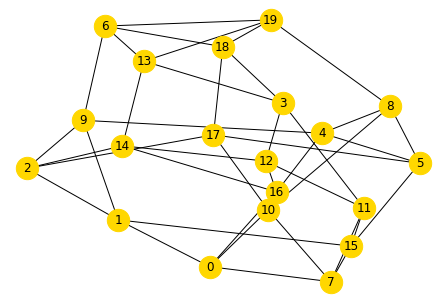

In [6]:
nx.draw_spring(G, node_color='gold', node_size=500, with_labels=True)

In [7]:
qaoa = QAOA(G)

In [8]:
%%time
res = qaoa.optimize(n_samples=25000)

CPU times: user 9min 15s, sys: 17.8 s, total: 9min 33s
Wall time: 9min 35s


In [9]:
res.f

17.042079999999995

In [10]:
res.x

array([0.28760761, 0.45782146])

In [11]:
gamma, beta = res.x

In [12]:
# gamma, beta = (0.29400385570351956, 0.46418966810304707)

In [13]:
logpsi = RBM(n_visible=nq)

In [14]:
for i, j in G.edges(): 
    logpsi.RZZ(i, j, phi=2*gamma)

In [15]:
logpsi.fold_imag_params()

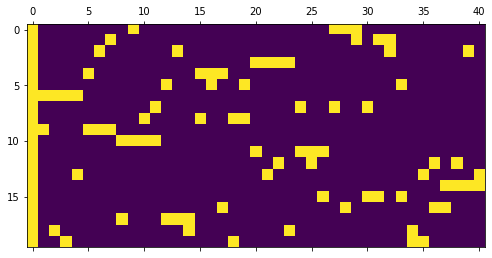

In [16]:
plt.matshow(logpsi.mask)

In [17]:
%time psi_exact = qaoa.simulate(gamma, beta).final_state

CPU times: user 552 ms, sys: 34.5 ms, total: 586 ms
Wall time: 594 ms


In [18]:
p_exact = np.abs(psi_exact)**2

In [20]:
nums = np.where(p_exact[1:-1] == p_exact[1:-1].max())[0]

In [21]:
[np.binary_repr(num, width=nq) for num in nums]

['00010010000001000010', '11101101111110111011']

## RBM optimization

In [22]:
lr = 1e-1
tol = 1e-4

In [23]:
logpsi.mask[:] = True

In [24]:
r = 6
logpsi.add_hidden_units(num=r*logpsi.nv - logpsi.nh)

In [25]:
np.cos(beta)**2, np.sin(beta)**2

(0.8046404475617938, 0.19535955243820624)

In [26]:
%%time

for n in range(nq):
    
    print('Qubit {} starting...'.format(n+1))
        
    params, Fs = rx_optimization(logpsi, n, beta, tol=tol, lr=lr, lookback=10, resample_phi=1, sigma=0.0,
                                   psi_mcmc_params=(2000,3,200,20), phi_mcmc_params=(2000,3,200,20),
                                   eps=1e-5, verbose=True)
    
    logpsi.set_flat_params(params)
    logpsi.fold_imag_params()
        
    print('\nQubit {} done! Final fidelity estimate: {:05.4f}'.format(n+1, Fs[-1]))

Qubit 1 starting...
Iteration    1 | Fidelity = 0.8593 | lr = 0.100 | diff_mean_F = 0.0000000
Iteration    2 | Fidelity = 0.8689 | lr = 0.100 | diff_mean_F = 0.0000000
Iteration    3 | Fidelity = 0.8929 | lr = 0.100 | diff_mean_F = 0.0000000
Iteration    4 | Fidelity = 0.9054 | lr = 0.100 | diff_mean_F = 0.0000000
Iteration    5 | Fidelity = 0.9273 | lr = 0.100 | diff_mean_F = 0.0000000
Iteration    6 | Fidelity = 0.9327 | lr = 0.100 | diff_mean_F = 0.0000000
Iteration    7 | Fidelity = 0.9556 | lr = 0.100 | diff_mean_F = 0.0000000
Iteration    8 | Fidelity = 0.9596 | lr = 0.100 | diff_mean_F = 0.0000000
Iteration    9 | Fidelity = 0.9685 | lr = 0.100 | diff_mean_F = 0.0000000
Iteration   10 | Fidelity = 0.9759 | lr = 0.100 | diff_mean_F = 0.0000000
Iteration   11 | Fidelity = 0.9771 | lr = 0.100 | diff_mean_F = 0.0000000
Iteration   12 | Fidelity = 0.9845 | lr = 0.100 | diff_mean_F = 0.0000000
Iteration   13 | Fidelity = 0.9854 | lr = 0.100 | diff_mean_F = 0.0000000
Iteration   14 | F

Iteration    2 | Fidelity = 0.8760 | lr = 0.100 | diff_mean_F = 0.0000000
Iteration    3 | Fidelity = 0.8983 | lr = 0.100 | diff_mean_F = 0.0000000
Iteration    4 | Fidelity = 0.9126 | lr = 0.100 | diff_mean_F = 0.0000000
Iteration    5 | Fidelity = 0.9275 | lr = 0.100 | diff_mean_F = 0.0000000
Iteration    6 | Fidelity = 0.9419 | lr = 0.100 | diff_mean_F = 0.0000000
Iteration    7 | Fidelity = 0.9468 | lr = 0.100 | diff_mean_F = 0.0000000
Iteration    8 | Fidelity = 0.9581 | lr = 0.100 | diff_mean_F = 0.0000000
Iteration    9 | Fidelity = 0.9676 | lr = 0.100 | diff_mean_F = 0.0000000
Iteration   10 | Fidelity = 0.9741 | lr = 0.100 | diff_mean_F = 0.0000000
Iteration   11 | Fidelity = 0.9762 | lr = 0.100 | diff_mean_F = 0.0000000
Iteration   12 | Fidelity = 0.9801 | lr = 0.100 | diff_mean_F = 0.0000000
Iteration   13 | Fidelity = 0.9826 | lr = 0.100 | diff_mean_F = 0.0000000
Iteration   14 | Fidelity = 0.9867 | lr = 0.100 | diff_mean_F = 0.0000000
Iteration   15 | Fidelity = 0.9881 | l

Iteration   26 | Fidelity = 0.9877 | lr = 0.100 | diff_mean_F = 0.0167841
Iteration   27 | Fidelity = 0.9875 | lr = 0.100 | diff_mean_F = 0.0131409
Iteration   28 | Fidelity = 0.9913 | lr = 0.100 | diff_mean_F = 0.0111800
Iteration   29 | Fidelity = 0.9874 | lr = 0.100 | diff_mean_F = 0.0101406
Iteration   30 | Fidelity = 0.9877 | lr = 0.100 | diff_mean_F = 0.0083197
Iteration   31 | Fidelity = 0.9886 | lr = 0.100 | diff_mean_F = 0.0075221
Iteration   32 | Fidelity = 0.9881 | lr = 0.100 | diff_mean_F = 0.0059244
Iteration   33 | Fidelity = 0.9893 | lr = 0.100 | diff_mean_F = 0.0050343
Iteration   34 | Fidelity = 0.9901 | lr = 0.100 | diff_mean_F = 0.0042150
Iteration   35 | Fidelity = 0.9891 | lr = 0.100 | diff_mean_F = 0.0033332
Iteration   36 | Fidelity = 0.9877 | lr = 0.100 | diff_mean_F = 0.0027848
Iteration   37 | Fidelity = 0.9883 | lr = 0.100 | diff_mean_F = 0.0024920
Iteration   38 | Fidelity = 0.9892 | lr = 0.100 | diff_mean_F = 0.0014680
Iteration   39 | Fidelity = 0.9922 | l

Iteration   18 | Fidelity = 0.9878 | lr = 0.100 | diff_mean_F = 0.0000000
Iteration   19 | Fidelity = 0.9905 | lr = 0.100 | diff_mean_F = 0.0000000
Iteration   20 | Fidelity = 0.9918 | lr = 0.100 | diff_mean_F = 0.0000000
Iteration   21 | Fidelity = 0.9932 | lr = 0.100 | diff_mean_F = 0.0501513
Iteration   22 | Fidelity = 0.9918 | lr = 0.100 | diff_mean_F = 0.0418958
Iteration   23 | Fidelity = 0.9940 | lr = 0.100 | diff_mean_F = 0.0349635
Iteration   24 | Fidelity = 0.9952 | lr = 0.100 | diff_mean_F = 0.0292180

Qubit 14 done! Final fidelity estimate: 0.9952
Qubit 15 starting...
Iteration    1 | Fidelity = 0.8608 | lr = 0.100 | diff_mean_F = 0.0000000
Iteration    2 | Fidelity = 0.8740 | lr = 0.100 | diff_mean_F = 0.0000000
Iteration    3 | Fidelity = 0.8950 | lr = 0.100 | diff_mean_F = 0.0000000
Iteration    4 | Fidelity = 0.9076 | lr = 0.100 | diff_mean_F = 0.0000000
Iteration    5 | Fidelity = 0.9275 | lr = 0.100 | diff_mean_F = 0.0000000
Iteration    6 | Fidelity = 0.9328 | lr = 0

Iteration   28 | Fidelity = 0.9894 | lr = 0.100 | diff_mean_F = 0.0127866
Iteration   29 | Fidelity = 0.9931 | lr = 0.100 | diff_mean_F = 0.0103138
Iteration   30 | Fidelity = 0.9903 | lr = 0.100 | diff_mean_F = 0.0082438
Iteration   31 | Fidelity = 0.9898 | lr = 0.100 | diff_mean_F = 0.0072191
Iteration   32 | Fidelity = 0.9913 | lr = 0.100 | diff_mean_F = 0.0064491

Qubit 17 done! Final fidelity estimate: 0.9913
Qubit 18 starting...
Iteration    1 | Fidelity = 0.8509 | lr = 0.100 | diff_mean_F = 0.0000000
Iteration    2 | Fidelity = 0.8755 | lr = 0.100 | diff_mean_F = 0.0000000
Iteration    3 | Fidelity = 0.8970 | lr = 0.100 | diff_mean_F = 0.0000000
Iteration    4 | Fidelity = 0.9117 | lr = 0.100 | diff_mean_F = 0.0000000
Iteration    5 | Fidelity = 0.9251 | lr = 0.100 | diff_mean_F = 0.0000000
Iteration    6 | Fidelity = 0.9375 | lr = 0.100 | diff_mean_F = 0.0000000
Iteration    7 | Fidelity = 0.9505 | lr = 0.100 | diff_mean_F = 0.0000000
Iteration    8 | Fidelity = 0.9543 | lr = 0

Iteration   26 | Fidelity = 0.9915 | lr = 0.100 | diff_mean_F = 0.0194662
Iteration   27 | Fidelity = 0.9904 | lr = 0.100 | diff_mean_F = 0.0167162

Qubit 20 done! Final fidelity estimate: 0.9904
CPU times: user 5h 4min 37s, sys: 8min 4s, total: 5h 12min 42s
Wall time: 4h 28min 5s


In [27]:
%time psi = logpsi.get_state_vector(normalized=True)

CPU times: user 1min 18s, sys: 664 ms, total: 1min 19s
Wall time: 1min 22s


In [34]:
p = np.abs(psi)**2

In [28]:
utils.exact_fidelity(psi, psi_exact)

0.864974589800686

In [40]:
rbm_samples = logpsi.get_samples(n_steps=10000, n_chains=5, warmup=2000, step=20)

In [42]:
qaoa.cost(rbm_samples)

12.522279999999999

In [ ]:
qaoa.cost_from_probs(p_exact)

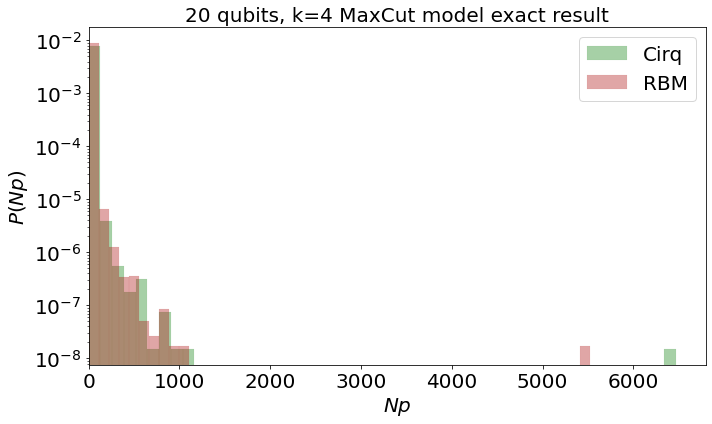

In [78]:
fig, ax = plt.subplots(figsize=[10,6])

N = 2**nq

ax.set_yscale('log')
ax.hist(N*p_exact, density=True, bins=50, lw=0.1, color='forestgreen', edgecolor='forestgreen', alpha=0.4, label='Cirq')
ax.hist(N*p, density=True, bins=50, lw=0.1, color='firebrick', edgecolor='firebrick', alpha=0.4, label='RBM')

ax.set_xlim(0)

ax.legend(frameon=True, fontsize=20)
ax.set_xlabel(r'$ N p $', fontsize=20)
ax.set_ylabel(r'$ P (Np) $', fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=20)

ax.set_title('{} qubits, k={} MaxCut model exact result'.format(nq, k), fontsize=20)

plt.tight_layout()
# plt.savefig('prob_dist_20qs_maxcut.pdf')

In [37]:
nums = np.where(p[1:-1] == p[1:-1].max())[0]

In [38]:
nums

array([73794])

In [39]:
[np.binary_repr(num, width=nq) for num in nums]

['00010010000001000010']

In [57]:
[int(i) for i in np.binary_repr(73794, width=nq)]

[0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0]

In [66]:
def cost_from_probs(qaoa, p):

    hilbert = np.array(list(logpsi.hilbert_iter()))
    cost = 0.0

    for qi, qj in qaoa.graph.edges():
        term = p*(-1)**(hilbert[:,qi.x]*hilbert[:,qj.x])
        cost += term.sum()

    return cost

In [76]:
cost_from_probs(qaoa, p_exact)

12.682423979004714